In [1]:
import pandas as pd
import seaborn as sns
import scipy

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import pprint
pp = pprint.PrettyPrinter(indent=4)

print("Using pandas %s version" % pd.__version__)
print("Using seaborn %s version"% sns.__version__)
print("Using scipy %s version" % scipy.__version__)


Using pandas 1.1.3 version
Using seaborn 0.11.0 version
Using scipy 1.5.2 version


In [2]:
ndcg = pd.read_table(r'C:\Projects\RecSys2020\results\figure2.txt',sep='\t',header=4,nrows=8)

ndcg.head()

,Recommender,Full,Unbiased,Test
0,iMF (full),0.167798,0.024865,0.575750
1,iMF (test),0.150733,0.024854,0.580891
2,kNN (full/test),0.160433,0.024123,0.572223
3,Normalized kNN (full),0.111315,0.018947,0.556579
4,Normalized kNN (test),0.003826,0.005382,0.576203


In [3]:
precision = pd.read_table(r'C:\Projects\RecSys2020\results\figure2.txt',sep='\t',header=14,nrows=8)

precision.head()

,Recommender,Full,Unbiased,Test
0,iMF (full),0.056256,0.006630,0.170430
1,iMF (test),0.052741,0.006707,0.170752
2,kNN (full/test),0.054563,0.006448,0.170015
3,Normalized kNN (full),0.043152,0.005426,0.168252
4,Normalized kNN (test),0.001770,0.001711,0.169974


In [4]:
recall = pd.read_table(r'C:\Projects\RecSys2020\results\figure2.txt',sep='\t',header=24,nrows=8)

recall.head()

,Recommender,Full,Unbiased,Test
0,iMF (full),0.233621,0.044083,0.664297
1,iMF (test),0.222376,0.044467,0.664874
2,kNN (full/test),0.228519,0.041968,0.663557
3,Normalized kNN (full),0.185319,0.035540,0.659431
4,Normalized kNN (test),0.006856,0.009605,0.663878


In [5]:
def figure2(data, legend=False, label=False, title=''):
    result = [list(a) for a in zip(data.Recommender, 
                                   data.Full.rank(ascending=False),
                                   data.Unbiased.rank(ascending=False),
                                   data.Test.rank(ascending=False))]

    artists = []
    for row, color in zip(result, ('red','blue','green','magenta', 'black', 'purple', 'grey', 'orange')):
        artists.append(plt.Line2D(xdata=[1,2,3], ydata=[row[1:]], lw=1, color=color, marker='o'))

    fig, ax = plt.subplots()

    for artist in artists:
        a = ax.add_artist(artist)

    ax.set_ybound([0.8,8.2])
    ax.set_xbound([0.94,3.06])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.gca().invert_yaxis()
    if (label):
        plt.ylabel('System ranking')
    if (legend):
        plt.legend(artists, recall.Recommender, bbox_to_anchor=(1.05, 1), loc='upper left', title='Recommender', title_fontsize='xx-large')
    #plt.tick_params(
    #    axis='x',          # changes apply to the x-axis
    #    which='both',      # both major and minor ticks are affected
    #    bottom=False,      # ticks along the bottom edge are off
    #    top=False,         # ticks along the top edge are off
    #    labelbottom=False) # labels along the bottom edge are off
    #plt.rcParams["figure.figsize"] = (2,6)
    plt.title(title)
    plt.xticks([1,2,3], ['Full', 'Unbiased', 'Test'])
    return result

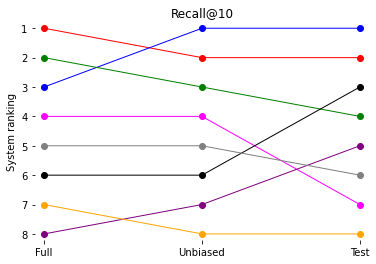

In [6]:
r = figure2(recall, label=True, title='Recall@10')

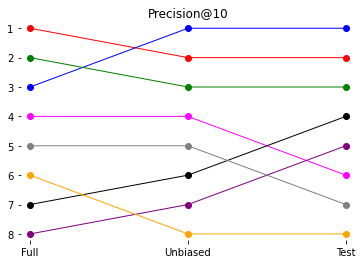

In [7]:
p = figure2(precision, title='Precision@10')

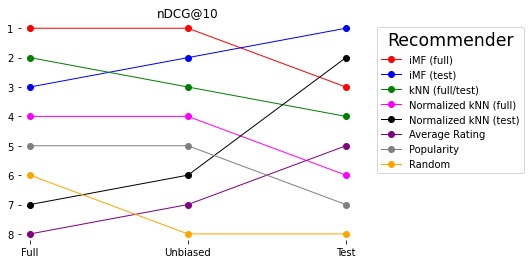

In [8]:
n = figure2(ndcg, title='nDCG@10', legend=True)

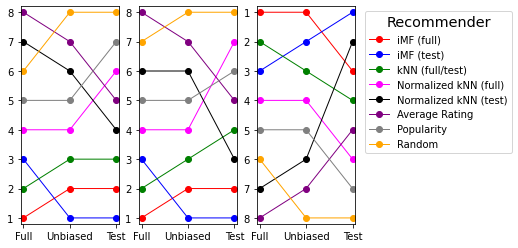

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex='row', constrained_layout=False)
#fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, constrained_layout=False)

def combine_figure(data, ax):
    artists = []
    for row, color in zip(data, ('red','blue','green','magenta', 'black', 'purple', 'grey', 'orange')):
        artists.append(plt.Line2D(xdata=[1,2,3], ydata=[row[1:]], lw=1, color=color, marker='o'))

    for artist in artists:
        ax.add_artist(artist)

    ax.set_ybound([0.8,8.2])
    ax.set_xbound([0.94,3.06])
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    return artists
    
combine_figure(p, ax1)
combine_figure(r, ax2)
artists = combine_figure(n, ax3)

plt.gca().invert_yaxis()

plt.xticks([1,2,3], ['Full', 'Unbiased', 'Test'])
    
plt.legend(artists, recall.Recommender, bbox_to_anchor=(1.05, 1), loc='upper left', title='Recommender', title_fontsize='x-large')
#plt.ylabel('System ranking')
#fig.tight_layout(h_pad=5, w_pad=5)

#fig.set_constrained_layout_pads(w_pad=2/72, h_pad=2/72, hspace=0.2, wspace=0.2)
